In [23]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [24]:
train = pd.read_csv("./data/fashion-mnist_train.csv")
test = pd.read_csv("./data/fashion-mnist_test.csv")
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [25]:
x_train, y_train = train.loc[:, train.columns != 'label']/255, train['label']
x_test, y_test = test.loc[:, test.columns != 'label']/255, test['label']

In [26]:
epochs = 1000

In [38]:
model = tf.keras.models.Sequential([
  tf.keras.Input((784,)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, verbose=1, callbacks=[early_stopping])
model.evaluate(x_test,  y_test, verbose=2) 

Epoch 1/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.7371 - loss: 0.8122 - val_accuracy: 0.8162 - val_loss: 0.4836
Epoch 2/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.8113 - loss: 0.5218 - val_accuracy: 0.8081 - val_loss: 0.5202
Epoch 3/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.8274 - loss: 0.4855 - val_accuracy: 0.8285 - val_loss: 0.4836
Epoch 4/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8339 - loss: 0.4527 - val_accuracy: 0.8557 - val_loss: 0.4118
Epoch 5/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.8389 - loss: 0.4370 - val_accuracy: 0.8578 - val_loss: 0.3899
Epoch 6/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8452 - loss: 0.4253 - val_accuracy: 0.8359 - val_loss: 0.4537
Epoch 7/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8540 - loss: 0.4014 - val_accuracy: 0.8592 - val_loss: 0.3888
Epoch 8/1000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - ac

[0.3113369047641754, 0.8902999758720398]

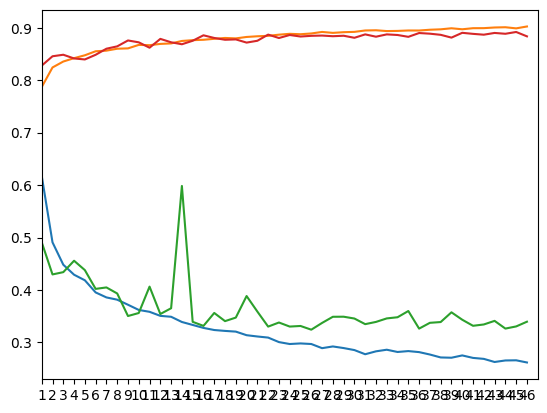

In [34]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

passed = len(loss)
t = np.arange(0, passed, 1)

fig, ax = plt.subplots()
ax.plot(t, loss)
ax.plot(t, accuracy)
ax.plot(t, val_loss)
ax.plot(t, val_accuracy)
ax.set(xlim=(0,passed), xticks=t, xticklabels=t+1)


plt.show()